# _Real Estate Price Prediction using ANN_

<img src='../data/images.jpg'>

_Real Estate Price Prediction, geçmiş veri ve çeşitli özellikleri kullanarak ev, daire veya ticari mülklerin gelecekteki fiyatlarını tahmin etme sürecidir. Bu proje, Python, Machine Learning ve ANN kullanarak doğru fiyat tahminleri yapmayı ve yatırımcılar, alıcılar veya satıcılar için bilinçli kararlar alınmasını sağlar._

| Column                               | Description                                      | Type    |
|-------------------------------------|-------------------------------------------------|---------|
| Transaction date                     | Tarih bilgisi (yıl/ay/gün gibi)                 | object  |
| House age                            | Evin yaşı (yıl)                                 | float64 |
| Distance to the nearest MRT station  | En yakın metro istasyonuna mesafe (metre/km)   | float64 |
| Number of convenience stores         | Yakındaki market sayısı                           | int64   |
| Latitude                             | Konum: enlem                                    | float64 |
| Longitude                            | Konum: boylam                                   | float64 |
| House price of unit area             | Hedef değişken: metrekare başına ev fiyatı      | float64 |

## _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## _Read Data_

In [2]:
df = pd.read_csv('../data/Real_Estate.csv')  
# 'Real_Estate.csv' dosyasını okur ve DataFrame (df) olarak yükler.

## _Exploratory Data Analysis_

In [3]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [5]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [6]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [7]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [8]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


In [9]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(414, 7)

## _Veri Görselleştirme / Outlier_

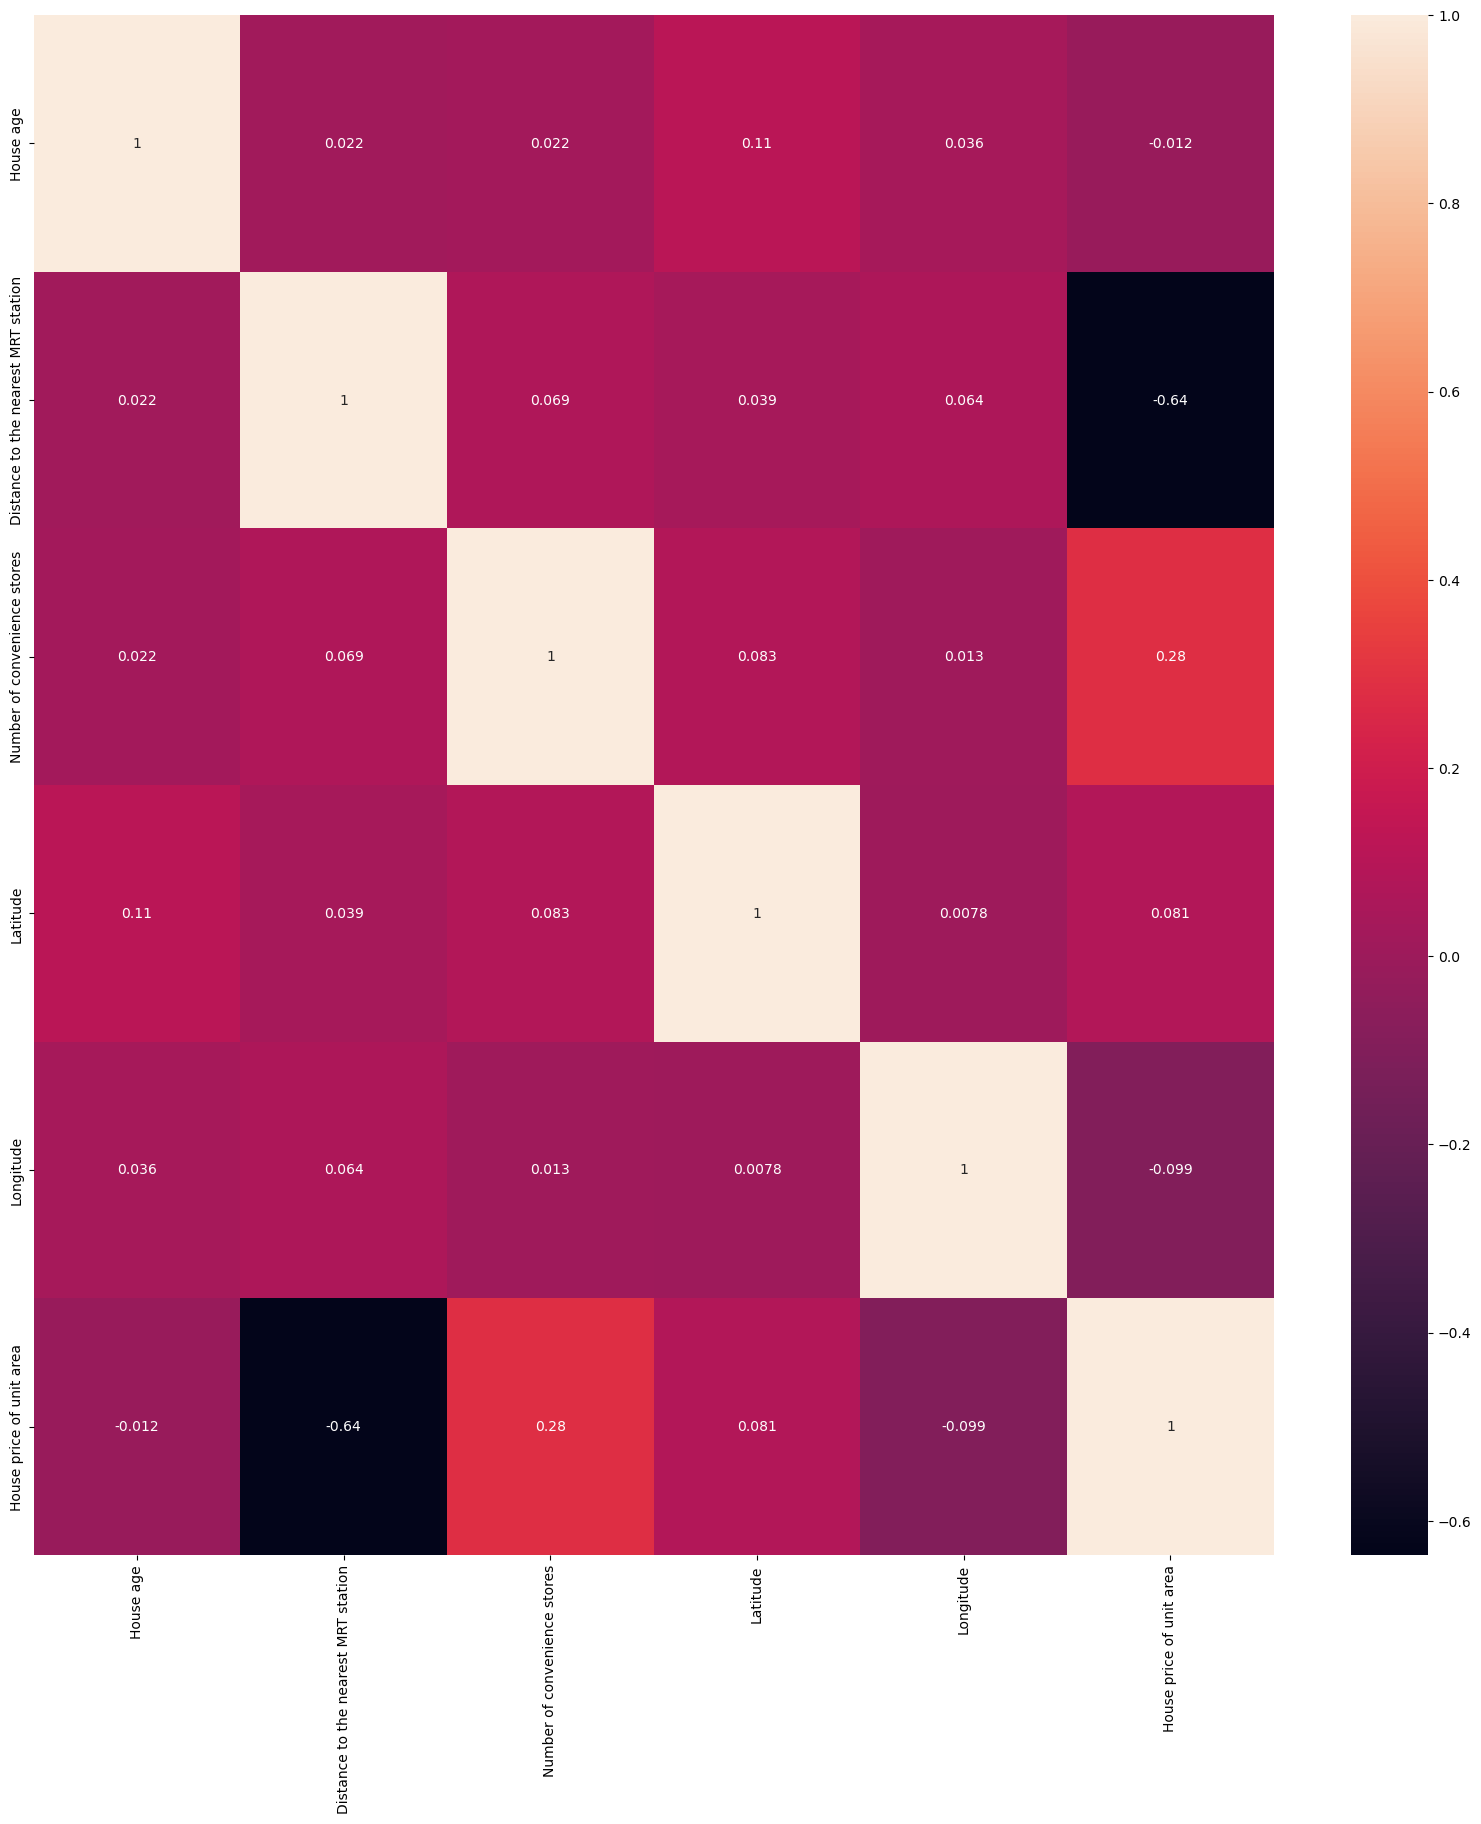

In [10]:
plt.figure(figsize=(20, 20))  

# Grafik boyutlarını ayarlamak için kullanılır. Burada 20x20 inçlik bir boyut belirlenmiş.

sns.heatmap(df.corr(numeric_only=True), annot=True); 
 
# Veri setindeki sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştirir.
# annot=True parametresi, her hücreye korelasyon değerini yazdırır.

In [19]:
abs(df.corr(numeric_only=True)['House price of unit area'].sort_values(ascending=False))  

# 'House price of unit area' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır.
# abs() fonksiyonu, negatif korelasyonları pozitif hale getirir (mutlak değeri alır).
# sort_values(ascending=False) ise korelasyonları büyükten küçüğe doğru sıralar. True yazsaydık küçükten büyüğe sıralardı.
# Bu, 'House price of unit area' sütunu ile en yüksek korelasyona sahip olan diğer sütunları görmeyi sağlar.

House price of unit area               1.000000
Number of convenience stores           0.280763
Latitude                               0.081008
Year                                   0.015745
Day                                    0.008659
House age                              0.012284
Month                                  0.041256
Longitude                              0.098626
Distance to the nearest MRT station    0.636579
Name: House price of unit area, dtype: float64

In [20]:
outliers = df.quantile(q=.97, numeric_only=True)  

# Veri çerçevesindeki sayısal sütunlar için, her birinin 0.97 (yüzde 97) çeyrek değerini hesaplar.
# Bu, verinin en yüksek %3'ünü temsil eder ve potansiyel aykırı (outlier) değerlerin tespiti için kullanılabilir.

In [21]:
# Fiyat için %97 üst sınırın üzerindekileri çıkar
df = df[df['House price of unit area'] < outliers['House price of unit area']]

# House age için aşırı büyük yaşları çıkar
df = df[df['House age'] < outliers['House age']]

# Distance to MRT için aşırı uzak olanları çıkar (isteğe bağlı)
df = df[df['Distance to the nearest MRT station'] < outliers['Distance to the nearest MRT station']]

# Number of convenience stores için aşırı yüksek değerleri çıkar (isteğe bağlı)
df = df[df['Number of convenience stores'] < outliers['Number of convenience stores']]

In [62]:
# Descriptive statistics of the dataset
descriptive_stats = df.describe()

descriptive_stats

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month,Day
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,17.515652,843.984972,3.837681,24.972320,121.519300,29.693606,2012.631884,6.385507,15.689855
std,11.240228,826.360244,2.642954,0.023712,0.026922,13.985790,0.482994,3.598985,8.661565
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000,2012.000000,1.000000,1.000000
25%,8.300000,289.324800,1.000000,24.951932,121.496022,20.073417,2012.000000,3.000000,9.000000
50%,16.200000,482.758100,4.000000,24.973048,121.519414,31.358471,2013.000000,6.000000,16.000000
75%,28.000000,1264.730000,6.000000,24.992310,121.543571,40.255333,2013.000000,10.000000,23.000000
max,39.700000,4079.418000,8.000000,25.014578,121.565321,56.921591,2013.000000,12.000000,31.000000


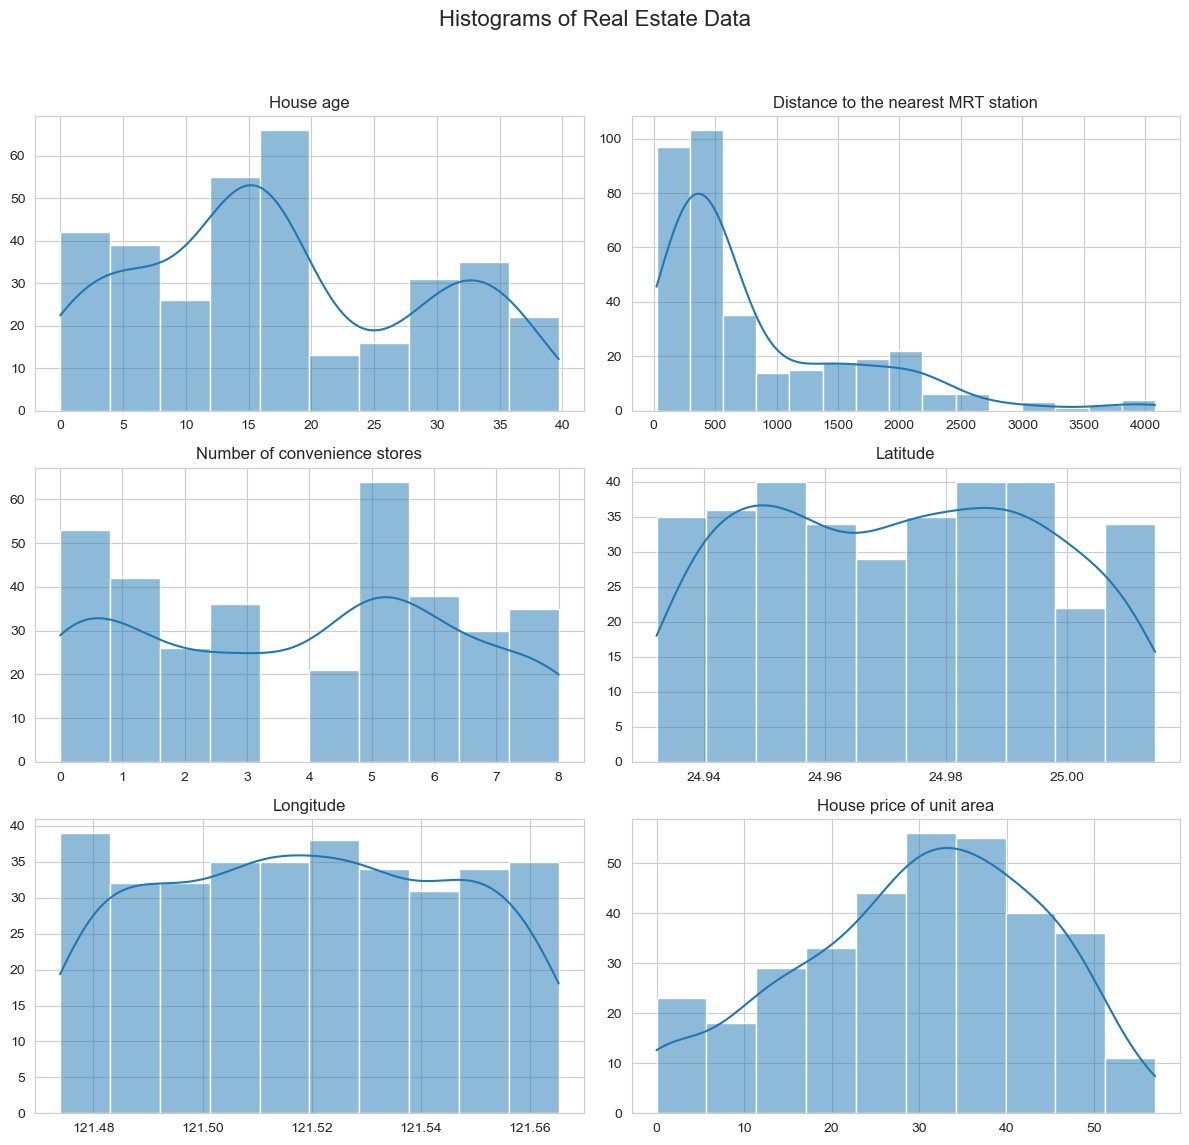

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## _Features Engineering_

In [13]:
# Transaction date'i sayısal özelliklere çevir
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df['Year'] = df['Transaction date'].dt.year
df['Month'] = df['Transaction date'].dt.month
df['Day'] = df['Transaction date'].dt.day

In [17]:
df = df.drop('Transaction date', axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 1 to 413
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            345 non-null    float64
 1   Distance to the nearest MRT station  345 non-null    float64
 2   Number of convenience stores         345 non-null    int64  
 3   Latitude                             345 non-null    float64
 4   Longitude                            345 non-null    float64
 5   House price of unit area             345 non-null    float64
 6   Year                                 345 non-null    int32  
 7   Month                                345 non-null    int32  
 8   Day                                  345 non-null    int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 22.9 KB


## _Modelling_

### _X, Y_

In [32]:
x = df.drop(['House price of unit area'], axis=1)  
# Modelde kullanılmayacak sütunları veri setinden çıkarır.  
# 'axis=1' sütun silmek için kullanılır (axis=0 satır siler).

y = df[['House price of unit area']]  
# Hedef değişken (bağımlı değişken) olarak 'price' sütununu belirler.

### _Verilerin Standardize Edilmesi (StandardScaler)_

In [33]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

### _Train Test Split_

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  
# Veriyi eğitim (%80) ve test (%20) olarak ikiye ayırır.  
# random_state=42 sabit tutulursa her çalıştırmada aynı sonuç elde edilir.

### _Machine Learning_

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Uyarı mesajlarını gizler.
pd.set_option("display.max_columns",100)  # Tüm sütunların görünmesini sağlar.

# Gerekli model kütüphaneleri
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor  # XGBoost modeli
from sklearn.svm import SVR  # Destek vektör regresyonu
from sklearn.neural_network import MLPRegressor  # Yapay sinir ağı tabanlı regresyon

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Veri ölçekleme araçları

# Tüm modelleri test eden fonksiyon
def algo_test(x, y):
    # Modelleri tanımlama
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    # Model listesi ve isimleri
    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = [
        'Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree',
        'Gradient Boosting', 'KNeighborsRegressor', 'AdaBoost',
        'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor'
    ]
    
    # Veriyi 0-1 aralığına ölçekleme (Min-Max Normalization)
    x = MinMaxScaler().fit_transform(x)
    
    # Veriyi eğitim (%80) ve test (%20) olarak ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    # Performans metriklerini depolamak için listeler
    r_squared = []
    rmse = []
    mae = []
    
    # Sonuç tablosu oluşturma
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    # Tüm modelleri sırayla eğitip test etme
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))  # Modelin açıklama gücü
        rmse.append(mean_squared_error(y_test, p) ** 0.5)  # Hata (Root Mean Squared Error)
        mae.append(mean_absolute_error(y_test, p))  # Ortalama mutlak hata
    
    # Sonuç tablosunu doldurma
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    # R² değerine göre en başarılı modelden en zayıfa doğru sıralama
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable

In [36]:
algo_test(x,y)

,R_Squared,RMSE,MAE
SGD,0.366074,10.322773,9.058420
KNeighborsRegressor,0.362096,10.355112,8.750162
Ridge,0.349184,10.459386,9.111267
Gradient Boosting,0.347660,10.471628,8.707215
Linear,0.341352,10.522134,9.221842
Lasso,0.230949,11.369852,9.420747
SVR,0.187060,11.689786,9.861238
AdaBoost,0.153146,11.931127,9.710453
XGBRegressor,0.140509,12.019816,10.309043
MLP Regressor,0.080894,12.429682,10.133540


### _Deep Learning_

#### _Import_

In [50]:
from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping: Eğitim sırasında belirli bir metrik iyileşmeyi durdurduğunda
# modeli otomatik olarak durduran callback yapısıdır.
# Overfitting'i engellemek ve gereksiz yere uzun eğitim süresini azaltmak için kullanılır.

#### _Neural Network Modeli_

In [51]:
model = Sequential()
# Boş bir yapay sinir ağı modeli oluşturulur

model.add(Dense(64, activation='relu'))
# İlk gizli katman: 64 nöron, ReLU aktivasyonu

model.add(Dense(128, activation='relu'))
# İkinci gizli katman: 128 nöron, öğrenme kapasitesini artırır

model.add(Dense(256, activation='relu'))
# Üçüncü gizli katman: 256 nöron, modelin en geniş katmanı

model.add(Dense(128, activation='relu'))
# Dördüncü gizli katman: 128 nöron, daralmaya başlıyor

model.add(Dense(64, activation='relu'))
# Beşinci gizli katman: 64 nöron

model.add(Dense(32, activation='relu'))
# Altıncı gizli katman: 32 nöron

model.add(Dense(1))
# Çıkış katmanı: 1 nöron (regresyon problemi olduğu için aktivasyon kullanılmaz)

model.compile(loss='mean_squared_error', optimizer='adam')
# loss = MSE → regresyon için uygun hata fonksiyonu
# optimizer = adam → ağırlıkları güncellemek için kullanılan optimizasyon algoritması

In [52]:
early_stop = EarlyStopping(
    monitor='val_loss',  # İzlenen metrik: doğrulama kaybı (validation loss)
    patience=10          # 10 epoch boyunca iyileşme olmazsa eğitim durur
)
# EarlyStopping overfitting'i önler ve gereksiz uzun eğitim süresini kısaltır

In [53]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),  # Test verisi doğrulama için kullanılıyor
    epochs=130,                        # Maksimum eğitim sayısı
    batch_size=32,                     # Her adımda 32 örnek işlenir
    callbacks=[early_stop],            # EarlyStopping aktif: val_loss iyileşmezse durdurur
    verbose=1                          # Eğitim bilgilerini ekrana yazdırır
)
# EarlyStopping sayesinde model gereksiz yere uzun süre eğitilmez
# En iyi validation loss değerinin olduğu epoch’ta eğitim sonlanır

Epoch 1/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1022.8199 - val_loss: 907.4158
Epoch 2/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 671.9531 - val_loss: 278.6046
Epoch 3/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 270.9643 - val_loss: 199.9201
Epoch 4/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 198.4702 - val_loss: 176.7160
Epoch 5/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 161.5534 - val_loss: 155.1482
Epoch 6/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 149.4974 - val_loss: 150.4931
Epoch 7/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 134.7839 - val_loss: 149.8372
Epoch 8/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.0489 - val_loss: 145.9055
Epoch 9/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 127.2506 - val_loss: 144.9895
Epoch 10/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.0278 - val_loss: 149.4379
Epoch 11/130
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 123.9636 - val_loss: 147.5812
Epoch 12/130
9/9 ━━━━━━━━━━━━━━━━━━━━

In [54]:
tahmin = model.predict(x_test)
# Eğitilen modelin test verisi üzerindeki tahminlerini üretir
# Regresyon olduğu için çıktılar ev fiyatı tahminleridir (sürekli sayısal değerler)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [55]:
r2_score(y_test, tahmin)
# R² skoru: modelin gerçek fiyatları ne kadar iyi açıkladığını gösterir
# 1'e ne kadar yakınsa model o kadar başarılıdır

0.16326922178268433

In [56]:
mean_squared_error(y_test, tahmin)**0.5
# RMSE (Root Mean Squared Error): Hata miktarının kök ortalama kare değeri
# Hata ne kadar düşükse model o kadar iyidir

11.859600160494319

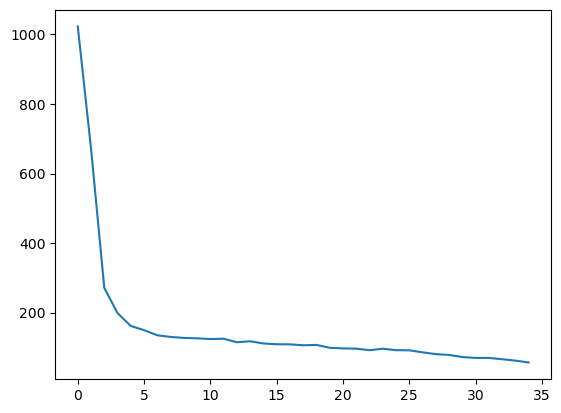

In [57]:
plt.plot(history.history['loss']);
# Eğitim sürecindeki 'loss' (MSE) değerlerinin epoch'lara göre değişimini çizer
# Eğri aşağı doğru gidiyorsa modelin öğrenmeye devam ettiği anlamına gelir

### _Torch_

In [58]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# df: Price içeren araç veri seti

x = df.drop('House price of unit area', axis=1)
# Bağımsız değişkenler (araç özellikleri)

y = df[['House price of unit area']]
# Bağımlı değişken: Tahmin edilmek istenen fiyat

x = pd.get_dummies(x, drop_first=True)
# Kategorik değişkenleri dummy değişkenlere dönüştürür
# drop_first=True → multicollinearity riskini azaltır

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
# Veriyi %80 eğitim, %20 test olarak böler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Sayısal verileri ölçeklendirir (ortalama=0, std=1)

# PyTorch tensörlerine dönüştürme
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# PyTorch Yapay Sinir Ağı Modeli
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        # Giriş katmanı → 64 nöron
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)
        # Çıkış katmanı → 1 nöron (regresyon)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        return self.fc7(x)
        # Son katmanda aktivasyon yok → regresyon için doğru kullanım

model = NeuralNetwork()
criterion = nn.MSELoss()
# Regresyon için MSE kayıp fonksiyonu

optimizer = optim.Adam(model.parameters())
# Adam optimizasyon algoritması

num_epochs = 130
batch_size = 32

# DataLoader: batch halinde eğitim için gerekli yapı
train_data = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Early Stopping için takip değişkenleri
best_loss = float('inf')
patience = 10
patience_counter = 0

# Eğitim döngüsü
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Doğrulama (Validation)
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}] '
          f'Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}')

    # Early Stopping kontrolü
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break
# Bu eğitim döngüsü hem modeli eğitir hem de validation loss iyileşmediğinde durdurur

Epoch [1/130] Loss: 1296.1067 | Val Loss: 1064.6687
Epoch [2/130] Loss: 1222.7900 | Val Loss: 943.5334
Epoch [3/130] Loss: 398.8434 | Val Loss: 318.5986
Epoch [4/130] Loss: 228.6959 | Val Loss: 194.7324
Epoch [5/130] Loss: 223.5896 | Val Loss: 183.3533
Epoch [6/130] Loss: 231.0326 | Val Loss: 151.3563
Epoch [7/130] Loss: 258.8697 | Val Loss: 142.8497
Epoch [8/130] Loss: 121.7101 | Val Loss: 134.4355
Epoch [9/130] Loss: 82.8035 | Val Loss: 130.7812
Epoch [10/130] Loss: 136.8123 | Val Loss: 131.8461
Epoch [11/130] Loss: 173.8084 | Val Loss: 128.9759
Epoch [12/130] Loss: 132.6311 | Val Loss: 129.6301
Epoch [13/130] Loss: 135.8250 | Val Loss: 128.4940
Epoch [14/130] Loss: 91.8349 | Val Loss: 131.8108
Epoch [15/130] Loss: 135.7555 | Val Loss: 130.7509
Epoch [16/130] Loss: 130.5933 | Val Loss: 133.7562
Epoch [17/130] Loss: 179.7288 | Val Loss: 129.5392
Epoch [18/130] Loss: 116.5010 | Val Loss: 129.2281
Epoch [19/130] Loss: 158.8468 | Val Loss: 129.0215
Epoch [20/130] Loss: 97.0834 | Val Loss

In [65]:
torch.save(model.state_dict(), "model.pth")

## _Summary_

_Bu projede, Taiwan’daki ev fiyatlarını tahmin etmek için geçmiş veri ve özellikler kullanıldı.  
Kullanılan model: **Artificial Neural Network (ANN)**_

### _Veri Özeti_
- _Transaction date, House age, Distance to MRT, Convenience stores, Latitude, Longitude_
- _Hedef değişken: House price per unit area_

### Model Sonuçları
| Model | R² | RMSE | MAE |
|-------|----|------|-----|
| ANN (DL) | 0.16 | 11.85 | 9.95 |

> Not: Model düşük performans gösterdi; veri boyutu sınırlı ve hiperparametre optimizasyonu yapılmadı. Ama bu çalışma, ANN kullanım sürecini göstermek için değerlidir.

### Öğrenilenler
- Veri ön işleme ve normalizasyon
- ANN ile regresyon tahminleri
- Model performans değerlendirme